In [1]:
!pip install category_encoders

In [60]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/students_train.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.describe()

,ID,Age,Billing Amount,Room Number
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,51.580360,25555.691557,301.032260
std,14433.901067,19.582194,14215.932247,115.228819
min,1.000000,18.000000,-2008.492140,101.000000
25%,12500.750000,35.000000,13239.403090,202.000000
50%,25000.500000,52.000000,25541.302835,302.000000
75%,37500.250000,68.000000,37853.996817,400.000000
max,50000.000000,85.000000,52764.276740,500.000000


In [6]:
df.dropna(inplace=True)

In [7]:
df['Name'] = df['Name'].str.title()

print(df['Name'].head())

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object


In [8]:
df = pd.get_dummies(df, columns=['Gender'])

In [9]:
print(df['Gender_Male'].head())

0     True
1     True
2    False
3    False
4    False
Name: Gender_Male, dtype: bool


In [10]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['Blood Type'])

In [17]:
print(df['Blood Type_A-'].head())

0    False
1    False
2     True
3    False
4    False
Name: Blood Type_A-, dtype: bool


In [13]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [14]:
df = pd.get_dummies(df, columns=['Medical Condition'])

In [18]:
print(df['Medical Condition_Cancer'].head())

0     True
1    False
2    False
3    False
4     True
Name: Medical Condition_Cancer, dtype: bool


In [21]:
df['Date of Admission'].unique()

array(['1/31/2024', '8/20/2019', '9/22/2022', ..., '5/31/2019',
       '10/12/2023', '3/14/2021'], dtype=object)

In [22]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')

In [25]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

In [24]:
print(df['Date of Admission'].head())

0   2024-01-31
1   2019-08-20
2   2022-09-22
3   2020-11-18
4   2022-09-19
Name: Date of Admission, dtype: datetime64[ns]


In [26]:
print(df['Discharge Date'].head())

0   2024-02-02
1   2019-08-26
2   2022-10-07
3   2020-12-18
4   2022-10-09
Name: Discharge Date, dtype: datetime64[ns]


In [27]:
df['Doctor'] = df['Doctor'].str.title()

print(df['Doctor'].head())

0       Matthew Smith
1     Samantha Davies
2    Tiffany Mitchell
3         Kevin Wells
4      Kathleen Hanna
Name: Doctor, dtype: object


In [28]:
df['Hospital'] = df['Hospital'].str.title()

print(df['Hospital'].head())

0               Sons And Miller
1                       Kim Inc
2                      Cook Plc
3    Hernandez Rogers And Vang,
4                   White-White
Name: Hospital, dtype: object


In [32]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [33]:
df = pd.get_dummies(df, columns=['Insurance Provider'])

In [35]:
print(df['Insurance Provider_Blue Cross'].head())

0     True
1    False
2    False
3    False
4    False
Name: Insurance Provider_Blue Cross, dtype: bool


In [36]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [37]:
df = pd.get_dummies(df, columns=['Admission Type'])

In [38]:
print(df['Admission Type_Emergency'].head())

0    False
1     True
2     True
3    False
4    False
Name: Admission Type_Emergency, dtype: bool


In [40]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [41]:
df = pd.get_dummies(df, columns=['Medication'])

In [43]:
print(df['Medication_Paracetamol'].head())

0     True
1    False
2    False
3    False
4    False
Name: Medication_Paracetamol, dtype: bool


In [55]:
negative_billing_rows = df[df['Billing Amount'] < 0]

print(negative_billing_rows['Medical Condition'].value_counts())
print(negative_billing_rows['Gender'].value_counts())
print(negative_billing_rows['Billing Amount'].describe())

count      96.000000
mean     -496.358243
std       426.438674
min     -2008.492140
25%      -792.084802
50%      -374.840042
75%      -144.345321
max       -23.866729
Name: Billing Amount, dtype: float64


In [48]:
Q1 = df['Billing Amount'].quantile(0.25)
Q3 = df['Billing Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where 'Billing amount' is an outlier
outliers = df[(df['Billing Amount'] < lower_bound) | (df['Billing Amount'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers based on IQR: {len(outliers)}")

Number of outliers based on IQR: 0


In [57]:
df['Billing_Is_Negative'] = df['Billing Amount'] < 0
df['Billing Amount'] = df['Billing Amount'].abs()

In [58]:
# Add a flag for negative values
df['Billing_Is_Negative'] = df['Billing Amount'] < 0

# Convert billing amount to positive for modeling
df['Billing Amount'] = df['Billing Amount'].abs()

In [59]:
df.to_csv("Training_Set_Preprocessed.csv", index=False)

In [62]:
df['Name'] = df['Name'].str.strip()
df['Name'] = df['Name'].str.replace(r'\s+', '_', regex=True)

In [63]:
df['Doctor'] = df['Doctor'].str.strip()
df['Doctor'] = df['Doctor'].str.replace(r'\s+', '_', regex=True)

In [65]:
df['Hospital'] = df['Hospital'].str.strip()
df['Hospital'] = df['Hospital'].str.replace(r'\s+', '_', regex=True)

In [74]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [76]:
test_results_map = {'Normal': 0, 'Inconclusive': 1, 'Abnormal': 2}

# Apply the mapping
df['Test Results'] = df['Test Results'].map(test_results_map)

In [77]:
print(df['Test Results'].head)

<bound method NDFrame.head of 0        0
1        1
2        0
3        2
4        2
        ..
49995    1
49996    2
49997    2
49998    2
49999    1
Name: Test Results, Length: 50000, dtype: int64>


Correlation with target 'Result':
Test Results                           1.000000
Medical Condition_Arthritis            0.009866
Age                                    0.008891
Blood Type_A+                          0.004216
Gender_Female                          0.003960
Medical Condition_Obesity              0.003774
Admission Type_Elective                0.002711
Blood Type_O+                          0.002592
Insurance Provider_Cigna               0.002573
Medication_Paracetamol                 0.002474
Medical Condition_Cancer               0.002393
Medical Condition_Diabetes             0.001914
Billing Amount                         0.001769
Blood Type_B+                          0.001693
Insurance Provider_Medicare            0.001604
Medication_Ibuprofen                   0.000880
Medication_Lipitor                     0.000693
Blood Type_O-                          0.000600
Admission Type_Emergency              -0.000044
Insurance Provider_Aetna              -0.000266
Insura

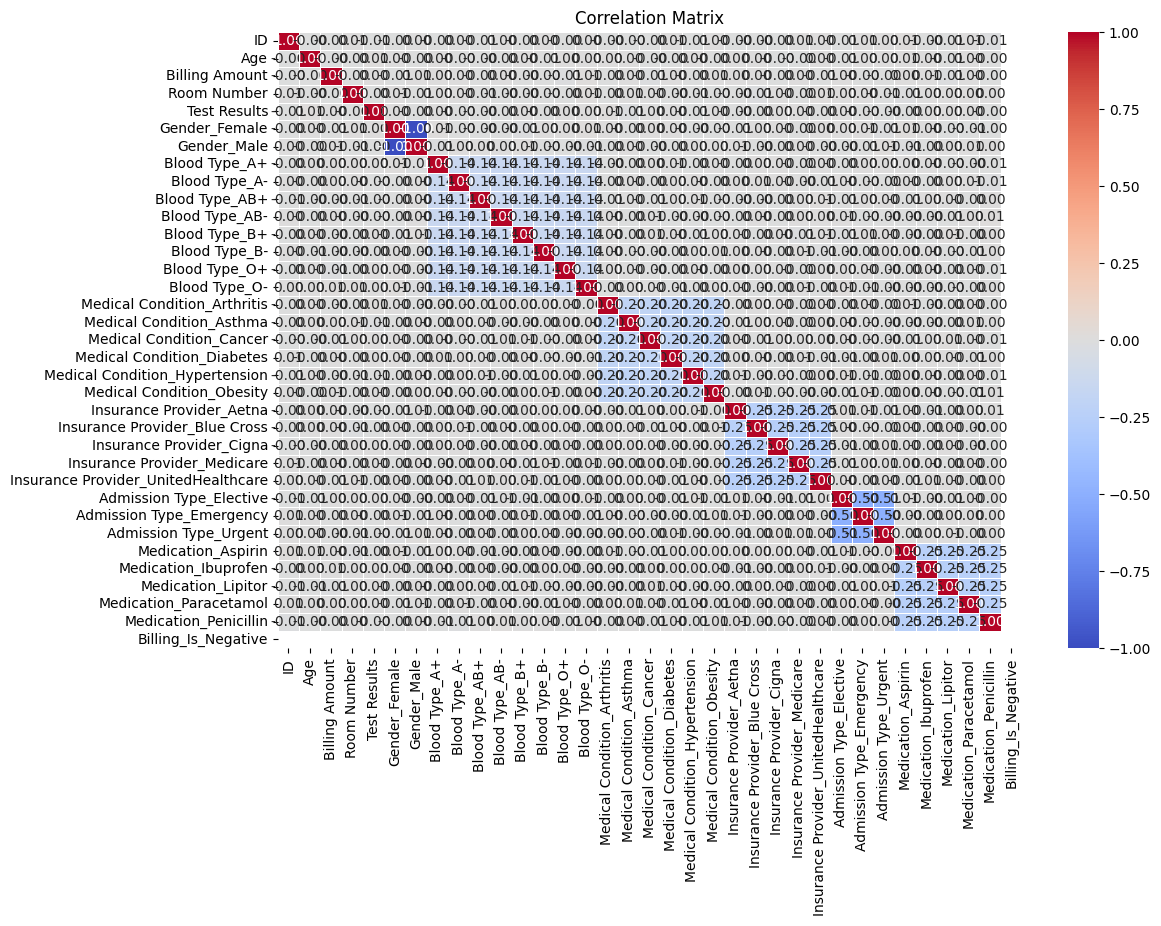

In [78]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display only correlation with the 'Result' column
print("Correlation with target 'Result':")
print(correlation_matrix['Test Results'].sort_values(ascending=False))

# Optional: Heatmap of the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

